# Black-Scholes Option Pricing – Complete Tutorial

### Imports and Utilities

In [1]:
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt
%matplotlib inline

### Black-Scholes Pricing Formula – Python Function

In [2]:
def black_scholes(S, K, T, r, sigma, option='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option == 'call':
        price = S * si.norm.cdf(d1) - K * np.exp(-r * T) * si.norm.cdf(d2)
    else:
        price = K * np.exp(-r * T) * si.norm.cdf(-d2) - S * si.norm.cdf(-d1)

    return price

### Option Greeks – Python Functions

In [3]:
def option_greeks(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    delta_call = si.norm.cdf(d1)
    delta_put = si.norm.cdf(d1) - 1
    gamma = si.norm.pdf(d1) / (S * sigma * np.sqrt(T))
    vega = S * si.norm.pdf(d1) * np.sqrt(T)
    theta_call = (-S * si.norm.pdf(d1) * sigma / (2 * np.sqrt(T))) - r * K * np.exp(-r * T) * si.norm.cdf(d2)
    theta_put = (-S * si.norm.pdf(d1) * sigma / (2 * np.sqrt(T))) + r * K * np.exp(-r * T) * si.norm.cdf(-d2)
    rho_call = K * T * np.exp(-r * T) * si.norm.cdf(d2)
    rho_put = -K * T * np.exp(-r * T) * si.norm.cdf(-d2)

    return {
        "Delta (Call)": delta_call,
        "Delta (Put)": delta_put,
        "Gamma": gamma,
        "Vega": vega,
        "Theta (Call)": theta_call,
        "Theta (Put)": theta_put,
        "Rho (Call)": rho_call,
        "Rho (Put)": rho_put
    }

### Plot Option Price vs. Spot Price

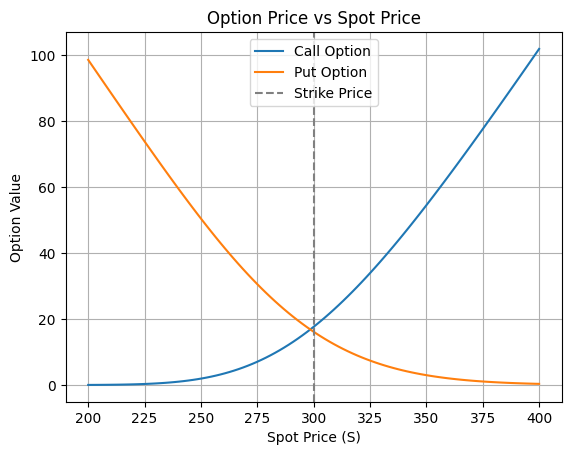

In [4]:
S = np.linspace(200, 400, 100)
K = 300
T = 0.5
r = 0.01
sigma = 0.2

call_prices = [black_scholes(s, K, T, r, sigma, option='call') for s in S]
put_prices = [black_scholes(s, K, T, r, sigma, option='put') for s in S]

plt.plot(S, call_prices, label='Call Option')
plt.plot(S, put_prices, label='Put Option')
plt.axvline(x=K, linestyle='--', color='gray', label='Strike Price')
plt.title("Option Price vs Spot Price")
plt.xlabel("Spot Price (S)")
plt.ylabel("Option Value")
plt.legend()
plt.grid(True)
plt.show()

### Plot Delta and Gamma vs. Spot Price

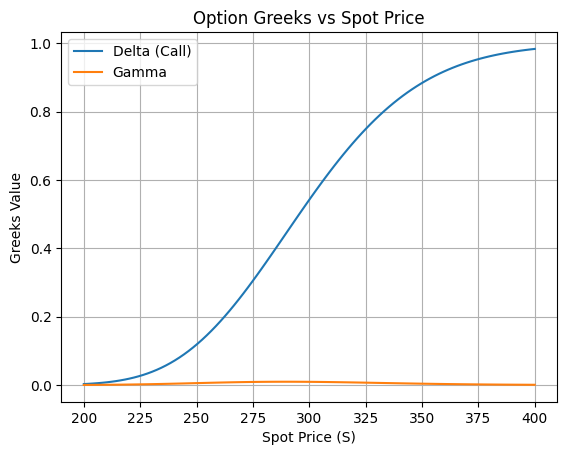

In [5]:
delta_vals = []
gamma_vals = []

for s in S:
    greeks = option_greeks(s, K, T, r, sigma)
    delta_vals.append(greeks["Delta (Call)"])
    gamma_vals.append(greeks["Gamma"])

plt.plot(S, delta_vals, label='Delta (Call)')
plt.plot(S, gamma_vals, label='Gamma')
plt.title("Option Greeks vs Spot Price")
plt.xlabel("Spot Price (S)")
plt.ylabel("Greeks Value")
plt.legend()
plt.grid(True)
plt.show()

### Example Calculation

In [6]:
S = 330
K = 335
T = 144/365
r = 0.02
sigma = 0.20

call_price = black_scholes(S, K, T, r, sigma, option='call')
put_price = black_scholes(S, K, T, r, sigma, option='put')
greeks = option_greeks(S, K, T, r, sigma)

print(f"Call Option Price: ${call_price:.2f}")
print(f"Put Option Price: ${put_price:.2f}")
print("Greeks:")
for k, v in greeks.items():
    print(f"  {k}: {v:.4f}")

Call Option Price: $15.43
Put Option Price: $17.80
Greeks:
  Delta (Call): 0.5024
  Delta (Put): -0.4976
  Gamma: 0.0096
  Vega: 82.6897
  Theta (Call): -23.9665
  Theta (Put): -17.3192
  Rho (Call): 59.3157
  Rho (Put): -71.8100


### Summary
This notebook provides a complete implementation of Black-Scholes pricing model, including:
- Closed-form solution for European call and put options
- Calculation of Greeks (sensitivities)
- Plotting price and sensitivities